<a href="https://colab.research.google.com/github/SwethaVipparla/Tensorflow/blob/master/RNN/Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [4]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 0s 6ms/step - loss: 0.7758 - accuracy: 0.5104 - val_loss: 0.7036 - val_accuracy: 0.4972
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4980 - val_loss: 0.6950 - val_accuracy: 0.4996
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5008 - val_loss: 0.6965 - val_accuracy: 0.4964
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5120 - val_loss: 0.6955 - val_accuracy: 0.4856
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5012 - val_loss: 0.6953 - val_accuracy: 0.5104
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5088 - val_loss: 0.6951 - val_accuracy: 0.5120
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4948 - val_loss: 0.6945 - val_accuracy: 0.4896
Epoch 8/100
7

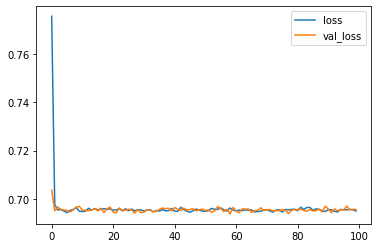

In [5]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

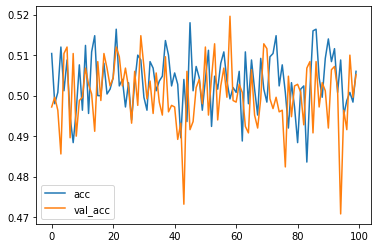

In [6]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [7]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

In [8]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 6ms/step - loss: 0.7168 - accuracy: 0.4664 - val_loss: 0.6942 - val_accuracy: 0.4884
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5040 - val_loss: 0.6942 - val_accuracy: 0.5136
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5456 - val_loss: 0.6885 - val_accuracy: 0.5280
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.5948 - val_loss: 0.6633 - val_accuracy: 0.6488
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6349 - accuracy: 0.6988 - val_loss: 0.6029 - val_accuracy: 0.7260
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5589 - accuracy: 0.7744 - val_loss: 0.5106 - val_accuracy: 0.8176
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8436 - val_loss: 0.4088 - val_accuracy: 0.8672
Epoch 8/200
7

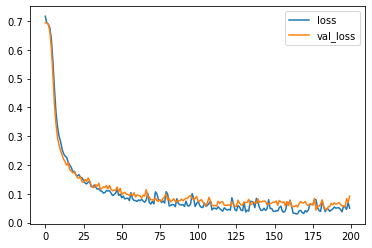

In [9]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

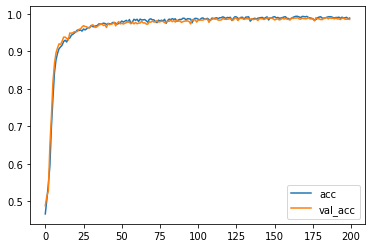

In [10]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [12]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 0s 6ms/step - loss: 0.7197 - accuracy: 0.5012 - val_loss: 0.6979 - val_accuracy: 0.4864
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5072 - val_loss: 0.6900 - val_accuracy: 0.5392
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.5400 - val_loss: 0.6681 - val_accuracy: 0.5804
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6132 - val_loss: 0.6435 - val_accuracy: 0.6296
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6303 - accuracy: 0.6396 - val_loss: 0.6233 - val_accuracy: 0.6676
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6120 - accuracy: 0.6632 - val_loss: 0.5993 - val_accuracy: 0.6864
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5690 - accuracy: 0.7080 - val_loss: 0.5494 - val_accuracy: 0.7288
Epoch 8/200
7

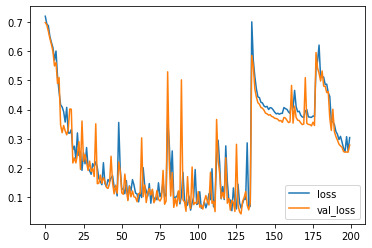

In [13]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

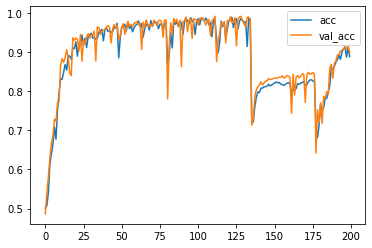

In [14]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6948 - accuracy: 0.4884 - val_loss: 0.6954 - val_accuracy: 0.4716
Epoch 2/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6943 - accuracy: 0.4884 - val_loss: 0.6941 - val_accuracy: 0.4748
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6944 - accuracy: 0.4844 - val_loss: 0.6932 - val_accuracy: 0.5024
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6934 - accuracy: 0.4980 - val_loss: 0.6942 - val_accuracy: 0.4684
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.5056 - val_loss: 0.6935 - val_accuracy: 0.5076
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6934 - accuracy: 0.4964 - val_loss: 0.6944 - val_accuracy: 0.4980
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6937 - accuracy: 0.5028 - val_loss: 0.6943 - val_accuracy: 0.4740
Epoch 8/200


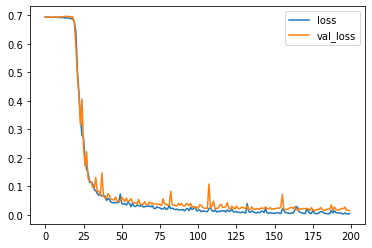

In [16]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

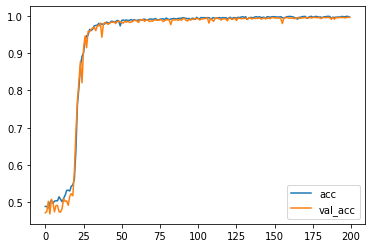

In [17]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [18]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [19]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 9ms/step - loss: 0.7106 - accuracy: 0.5020 - val_loss: 0.7005 - val_accuracy: 0.5020
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6948 - accuracy: 0.5120 - val_loss: 0.7009 - val_accuracy: 0.5136
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5180 - val_loss: 0.7020 - val_accuracy: 0.5056
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5212 - val_loss: 0.6983 - val_accuracy: 0.5044
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5296 - val_loss: 0.6954 - val_accuracy: 0.5080
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5168 - val_loss: 0.6963 - val_accuracy: 0.5116
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5248 - val_loss: 0.7006 - val_accuracy: 0.5072
Epoch 8/200
7

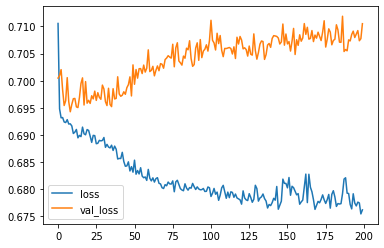

In [20]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

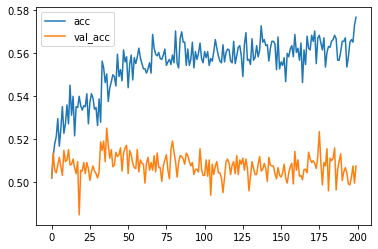

In [21]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [22]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6951 - accuracy: 0.4880 - val_loss: 0.6930 - val_accuracy: 0.5056
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6928 - accuracy: 0.5124 - val_loss: 0.6934 - val_accuracy: 0.5128
Epoch 3/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6930 - accuracy: 0.5124 - val_loss: 0.6932 - val_accuracy: 0.5188
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6927 - accuracy: 0.5132 - val_loss: 0.6935 - val_accuracy: 0.5108
Epoch 5/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6929 - accuracy: 0.5160 - val_loss: 0.6935 - val_accuracy: 0.5108
Epoch 6/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6919 - accuracy: 0.5180 - val_loss: 0.6942 - val_accuracy: 0.5076
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6927 - accuracy: 0.5168 - val_loss: 0.6943 - val_accuracy: 0.4980
Epoch 

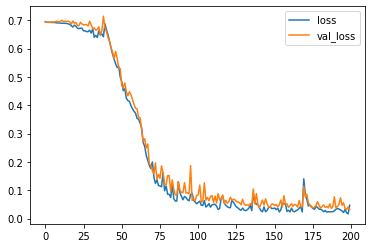

In [23]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

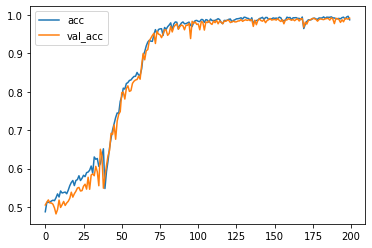

In [24]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [25]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6970 - accuracy: 0.5100 - val_loss: 0.6978 - val_accuracy: 0.4900
Epoch 2/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6952 - accuracy: 0.5020 - val_loss: 0.6941 - val_accuracy: 0.4860
Epoch 3/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6938 - accuracy: 0.4984 - val_loss: 0.6938 - val_accuracy: 0.5124
Epoch 4/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6936 - accuracy: 0.5112 - val_loss: 0.6927 - val_accuracy: 0.5272
Epoch 5/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.5216 - val_loss: 0.6930 - val_accuracy: 0.5120
Epoch 6/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6933 - accuracy: 0.5204 - val_loss: 0.6937 - val_accuracy: 0.5116
Epoch 7/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6932 - val_accuracy: 0.5128
Epoch 

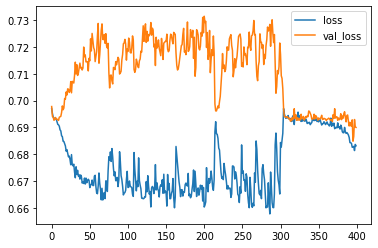

In [26]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

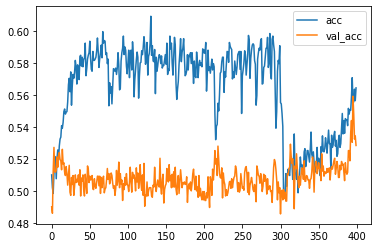

In [27]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [28]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [29]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 2s 19ms/step - loss: 0.6961 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5032
Epoch 2/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6938 - accuracy: 0.5052 - val_loss: 0.6932 - val_accuracy: 0.5024
Epoch 3/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6937 - accuracy: 0.5020 - val_loss: 0.6933 - val_accuracy: 0.5032
Epoch 4/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6933 - accuracy: 0.5088 - val_loss: 0.6932 - val_accuracy: 0.4964
Epoch 5/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6933 - accuracy: 0.5072 - val_loss: 0.6929 - val_accuracy: 0.4968
Epoch 6/400
79/79 [==============================] - 1s 17ms/step - loss: 0.6932 - accuracy: 0.5068 - val_loss: 0.6929 - val_accuracy: 0.5072
Epoch 7/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6930 - accuracy: 0.5084 - val_loss: 0.6941 - val_accuracy: 0.5036
Epoch 

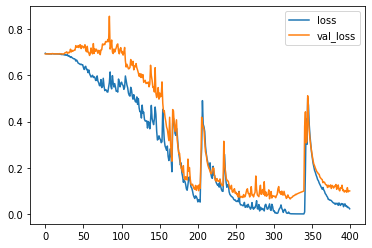

In [30]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

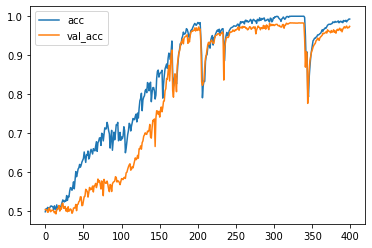

In [31]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [32]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 2s 20ms/step - loss: 0.6954 - accuracy: 0.4868 - val_loss: 0.6921 - val_accuracy: 0.5284
Epoch 2/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6927 - accuracy: 0.5228 - val_loss: 0.6935 - val_accuracy: 0.5032
Epoch 3/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6936 - accuracy: 0.5052 - val_loss: 0.6925 - val_accuracy: 0.5128
Epoch 4/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6924 - accuracy: 0.5152 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6924 - accuracy: 0.5236 - val_loss: 0.6923 - val_accuracy: 0.5252
Epoch 6/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6925 - accuracy: 0.5060 - val_loss: 0.6922 - val_accuracy: 0.5264
Epoch 7/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6923 - accuracy: 0.5156 - val_loss: 0.6941 - val_accuracy: 0.4992
Epoch 

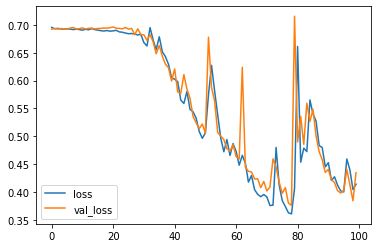

In [33]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

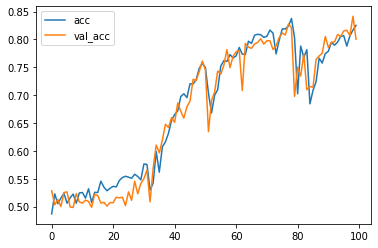

In [34]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()